<a href="https://colab.research.google.com/github/johnatanDM/MachineLearning/blob/main/HOMLwSKL%26TFcap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classificação

Baixando o dataset MNIST

In [1]:
from sklearn.datasets import fetch_openml
X,y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [2]:
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

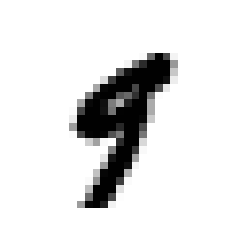

In [4]:
#vamos ver um exemplo desse dataset
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [5]:
y[36000]

'9'

In [6]:
#separar conjunto de treino e conjunto de teste
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
#emabaralhar o conjunto de treino
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

Treinando um Classificador binário

In [8]:
y_train_9 = (y_train == '9')
y_test_9 = (y_test == '9')
print(y_train_9)
y_train[0]

[False False False ... False False False]


'0'

In [9]:
# np.unique(y_test_9)

In [10]:
#iremos usar o SGD - Gradiente Descendente Estocástico
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_9)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
#fazendo as predições
sgd_clf.predict([some_digit])

array([ True])

Medindo o desempenho

In [25]:
#Validação cruzada
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_9):
  clone_cfl = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_9[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_9[test_index]

  clone_cfl.fit(X_train_folds, y_train_folds)
  y_pred = clone_cfl.predict(X_test_fold)
  n_corret = sum(y_pred == y_test_fold)
  print(n_corret / len(y_pred))

0.9414
0.94925
0.93715


In [27]:
#utilizando a função cross_val_score()
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_9, cv=3, scoring="accuracy")

array([0.9514, 0.941 , 0.9486])

95% de acurácia parece incrível, mas e se fizermos um classificador ridículo que apenas diz que todos não são 9. Quanto será que ele acerta?

In [30]:
from sklearn.base import BaseEstimator

class Never9Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

never_9_clf = Never9Classifier()
cross_val_score(never_9_clf, X_train, y_train_9, cv=3, scoring="accuracy")

array([0.899  , 0.90315, 0.9004 ])

Sim, 90% de acurácia. Isso é pq só 10% das imagens são "9" então se sempre chutar "Não 9" vai acertar 90% das vezes.